In [ ]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from numpy import random
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import random
from scipy import stats
from scipy.stats import linregress
from scipy.stats import t
import seaborn as sns
import statistics

# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

%matplotlib notebook
%matplotlib inline

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/marshrut.jpg'>


# [Основы статистики (Часть 1)](https://stepik.org/course/76/syllabus/)

Автор лекций: **Анатолий Карпов**

Конспект: **EG**

## Содержание

### Часть 1 Введение
 - [1.2 Генеральная совокупность и выборка](#1.2-Генеральная-совокупность-и-выборка)
 - [1.3 Типы переменных](#1.3-Типы-переменных)
 - [Описательная статистика](#Описательная-статистика)
 - [1.4 Меры центральной тенденции](#1.4-Меры-центральной-тенденции)
     - [Мода](#Мода)
     - [Медиана](#Медиана)
     - [Среднее значение](#Среднее-значение)
     - [Примеры](#1.Примеры)
 - [1.5 Меры изменчивости](#1.5-Меры-изменчивости)
    - [Размах](#Размах)
    - [Дисперсия](#Дисперсия)
    - [Квартили распределения](#Квартили-распределения)
    - [Пример](#2.Пример)
 - [1.7 Нормальное распределение](#1.7-Нормальное-распределение)
    - [Z-преобразование](#Z-преобразование)
    - [Правило 3х-сигм](#Правило-3х-сигм)
    - [Примеры](#3.Примеры)
 - [1.8 Центральная предельная теорема](#1.8-Центральная-предельная-теорема)
    - [Примеры](#4.Примеры)
 - [1.9 Доверительные интервалы для среднего](#1.9-Доверительные-интервалы-для-среднего)
 - [1.10 Идея статистического вывода](#1.10-Идея-статистического-вывода)
     - [Статистическая проверка гипотез](#Статистическая-проверка-гипотез)
     - [p-уровень значимости](#p-уровень-значимости)

### Часть 2 Сравнение средних
 - [2.1 T-распределение](#2.1-T-распределение)
     - [Подробно про нормальное и t-распредление](#Подробно-про-нормальное-и-t-распредление)
     - [Примеры](#5.Примеры)
 - [2.2 Сравнение двух средних; t-критерий Стьюдента](#2.2-Сравнение-двух-средних.-t-критерий-Стьюдента)
     - [Примеры применения t-критерий Стьюдента](#Примеры-применения-t-критерий-Стьюдента)
     - [Построение графиков](#6.-Примеры)
 - [2.3 Проверка распределения на нормальность](#2.3-Проверка-распределения-на-нормальность)
     - [QQ-plot](#QQ-plot)
     - [Примеры](#7.Примеры)
 - [2.4 Однофакторный дисперсионный анализ](#2.4-Однофакторный-дисперсионный-анализ)
 - [2.5 Множественные сравнения в ANOVA](#2.5-Множественные-сравнения-в-ANOVA)
     - [почему мы не можем применить t-критерий для более двух выборок](#почему-мы-не-можем-применить-t-критерий-для-более-двух-выборок)
 - [2.6 Многофакторный ANOVA](#2.6-Многофакторный-ANOVA)
 - [2.7 АБ тесты и статистика](#2.7-АБ-тесты-и-статистика)
  

### Часть 3 Корреляция и регрессия

 - [3.1 Понятие корреляции](#3.1-Понятие-корреляции)
     - [Ковариация](#Ковариация)
     - [Примеры](#Примеры-3.1)
 - [3.2 Условия применения коэффициента корреляции](#3.2-Условия-применения-коэффициента-корреляции)
 - [3.3 Регрессия с одной независимой переменной](#3.3-Регрессия-с-одной-независимой-переменной)
 - [3.4 Гипотеза о значимости взаимосвязи и коэффициент детерминации](#3.4-Гипотеза-о-значимости-взаимосвязи-и-коэффициент-детерминации)
 - [3.5 Условия применения линейной регрессии с одним предиктором](#3.5-Условия-применения-линейной-регрессии-с-одним-предиктором)
 - [3.6 Применение регрессионного анализа и интерпретация результатов](#3.6-Применение-регрессионного-анализа-и-интерпретация-результатов)
 - [3.7 Задача предсказания значений зависимой переменной](#3.7-Задача-предсказания-значений-зависимой-переменной)
 - [3.8 Регрессионный анализ с несколькими независимыми переменными](#3.8-Регрессионный-анализ-с-несколькими-независимыми-переменными)
     - [Пример расчёта и визуализации множественной регрессии](#Пример-расчёта-и-визуализации-множественной-регрессии)
 - [3.9 Выбор наилучшей модели](#3.9-Выбор-наилучшей-модели)
 - [3.10 Классификация: логистическая регрессия и кластерный анализ](#3.10-Классификация:-логистическая-регрессия-и-кластерный-анализ)
 - [3.11 GLM и продвинутые темы](#3.11-GLM-и-продвинутые-темы)
 - [3.12  Заключение](#3.12-Заключение)
 - [](#)
   
 
 

[Полезные ссылки](#Полезные-ссылки)

# Часть 1 Введение

## 1.2 Генеральная совокупность и выборка
[Вернуться к содержанию](#Содержание)

- **Генеральная совокупность** (от лат. generis — общий, родовой) — совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи. Далее ГС.
- **Репрезентативная выборка** – это такая выборка, в которой все основные признаки генеральной совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции или с той же частотой, с которой данный признак выступает в этой генеральной совокупности.

### Способы репрезентативной выборки
- **Простая случайная выборка** (simple random sample)
- **Стратифицированная выборка** (stratified sample) – разделение ГС на страты (группы) а оттуда уже делается случайная выборка.
- **Групповая выборка** (cluster sample) – похожие группы выбираются из выборки и далее делается случайная выборка (например, районы одного города)
 
| групповая выборка                                                                                                                | Стратифицированная выборка                                                                              |
|----------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Выборка формируется только из несколько субпопуляций (кластеров)                                                                 | Выборка формируется из всех субпопуляций (страт)                                                        |
| В пределах кластера элементы должны быть разнородны, тогда как поддерживается однородность или схожесть между разными кластерами | В пределах страты элементы должны быть однородны, а между стратами должна быть разнородность (различия) |
| Схема выборки нужна только для кластеров, попавших в выборку                                                                     | Должна быть сформирована полная схема выборки для всех стратифицированных субпопуляций                  |
| Повышает эффективность выборки, уменьшая стоимость                                                                               | Повышает точность                                                                                       |



## 1.3 Типы переменных
[Вернуться к содержанию](#Содержание)

 - **Числовые (Количественные)** – измеряемые (например, рост):
    - **Непрерывные** – переменная принимает любое значение на определенном промежутке (расстояние, температура);
    - **Дискретные** – только определенные значения (3.5 ребенка в семье не будет).
 - **Категориальные (Номинативные, Качественные)** – разделение испытуемых на группы, цифры как маркеры (например: 1 – женщины, 2 – мужчины). Цифры как имена групп, не для расчетов. 
 - **Ранговые** – похожи на номинативные, только возможны сравнения (быстрее/медленнее и т.п.)

### Описательная статистика
**Глоссарий:**
 - **Эмпирические данные** - данные полученные опытным путём.

 - **Описательная (дескриптивная) статистика** - обработка данных полученных эмпирическим путём и их систематизация, наглядное представление в форме графиков, таблиц, а также их количественное описание посредством основных статистических показателей.

 - **Распределение вероятностей** - это закон, описывающий область значений случайной величины и вероятность её появления (частоту) в данной области. То есть насколько часто X появляется в данном диапазоне значений.

 - **Гистограмма частот** - ступенчатая функция показывающая насколько часто вероятно появление величины в указанном диапазоне значений.


## 1.4 Меры центральной тенденции
[Вернуться к содержанию](#Содержание)

**Мода**

Это значение признака, которое встречается максимально часто. В выборке может быть несколько или одна мода.

**Медиана**

Это значение признака, которое делит упорядочное множество пополам. Если множество содержит чётное количество элементов, то берётся среднее из двух серединных элементов упорядочного множества.

**Среднее значение**

Cумма всех значений измеренного признака делится на количество измеренных значений.

**Свойства среднего значения**

$M_{x + c} = \frac{\overset{n}{\underset{i=1}{\sum}}{(x_{i} + c)}}{n} = \frac{\overset{n}{\underset{i=1}{\sum}} x_{i}}{n} + \frac{\overset{n}{\underset{i=1}{\sum}} c}{n} = M_{x} + \frac{nc}{n} = M_{x} + c$

$M_{x * c} = \frac{\overset{n}{\underset{i=1}{\sum}}{(x_{i} \cdot c)}}{n} = \frac{c \cdot \overset{n}{\underset{i=1}{\sum}} x_{i}}{n} = c \cdot M_{x}$

$\overset{n}{\underset{i=1}{\sum}} (x_{i} - M_{x}) = n \cdot M_{x} - n \cdot M_{x} = 0$,

также среднее значение генеральной совокупности обозначается греческой буквой $\mu$, а выборки - $\overline{X}$.

### Вычисление моды, медианы, среднего в Python

In [ ]:
# Расчёт моды, медианы и среднего с помощью библиотек numpy и scipy

sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
# в numpy почему-то нет моды
print('mode:', stats.mode(sample))
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: ModeResult(mode=array([172]), count=array([4]))
median: 170.5
mean: 170.4


In [ ]:
# Расчёт моды, медианы и среднего с помощью библиотеки pandas

sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


## 1.5 Меры изменчивости
[Вернуться к содержанию](#Содержание)

**Размах** (Range) - разность между максимальным и минимальным значениям выборки. Крайне чувствителен к выбросам.

$R = X_{max} - X_{min}$

**Дисперсия** (Variance) - средний квадрат отклонений индивидуальных значений признака от их средней величины

**Дисперсия для генеральной совокупности**

$D = \frac{\sum_{i=1}^{n} (x_{i} - \mu)^2}{n}$

**Среднеквадратическое отклонение для генеральной совокупности**

$ \sigma = \sqrt{D}$, где

$x_i$ - отдельное значение

$\mu$ - среднее генеральной совокупности

$n$ - размер генеральной совокупности

**Дисперсия для выборки**

$D = \frac{\sum_{i=1}^{n} (x_{i} - \overline{X})^2}{n-1}$

**Среднеквадратическое отклонение для выборки**

$ {sd} = \sqrt{D}$, где

$\overline{X}$ - среднее значение выборки

$1$ - это количество степеней свободы

Важно отметить, что среднеквадратическое отклонение **для выборки** обозначают по другому, как $sd$ - standart deviation

**Свойства дисперсии**

$ D_{x+c} = D_x $

$ D_{x*c} = D_x+c^2 $

**Квантили распределения**

* **Квантиль** – значение, которое заданная случайная величина не превышает с фиксированной вероятностью: $P(X ≤ x_α) ≥ α$

* **Квартили** - это три точки (значения признака), которые делят **упорядочное** множество данных на 4 равные части.

* **Box plot** - такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

<img src="https://b.radikal.ru/b24/2103/9d/244f7a8bcb03.png" width=400>

$IQR$ - интерквартильный размах, число, которое показывает разброс средней половины (т.е. средние 50%) набора данных и помогает определить выбросы.

$IQR = Q3 - Q1$

**Квартили и IQR (inter quartile range)** используют, чтобы оценить наличие выбросов. Алгоритм расчета - посчитали квартили, посчитали разницу между ними, вычислили теоретический максимум и минимум, сравнили с имеющимся и выяснили есть ли у вас выбросы и сколько их. Если много, то нужно анализировать и решать брать ли их в выборку или нет.

**Выбросы** — это, проще говоря, те значения данных, которые находятся за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR.

### Вычисление размаха и стандартного отклонения в Python

In [ ]:
# Расчитываем размах и стандартное отклонение с помощью numpy
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

# The name of the function comes from the acronym for ‘peak to peak’.
print(f'Range: {np.ptp(sample)} is equal max - min: {np.max(sample) - np.min(sample)}')

# ddof - Delta Degrees of Freedom
print(f'Standard deviation: {np.std(sample, ddof=1):.2f}')

Range: 28 is equal max - min: 28
Standard deviation: 6.00


### Диаграмма boxplot

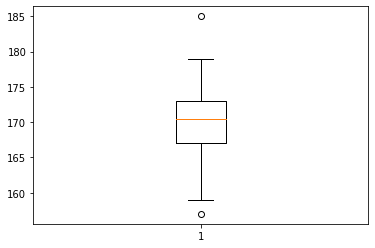

In [ ]:
# с помощью диаграммы boxplot мы можем узнать медиану, 2 и 3 квартиль
plt.boxplot(sample, showfliers=1)
plt.show()

## 1.7 Нормальное распределение
[Вернуться к содержанию](#Содержание)

**Унимодальное распределение** - распределение, которое имеет только одну моду.

**Характерные черты нормального распределения**
 - Унимодально
 - Симметрично
 - Отклонения наблюдений от среднего подчиняются определённому вероятностному закону
 
**Подробно**

Нормальное распределение возникает в результате воздействия множества факторов, вклад каждого из которых очень мал.

Для облегчения этого восприятия в 1873 году Фрэнсис Гальтон сделал устройство, которое в последствии назвали Доской Галтона (или квинкункс). Суть простая: сверху по середине подаются шарики, которые при прохождении нескольких уровней (например, 10-ти) на каждом уровне сталкиваются с препятствием, и при каждом столкновении отскакивают либо влево, либо вправо (с равной вероятностью).

Как вы догадываетесь, результатом прохождения - это распределение, стремящееся к нормальному!

Выглядит это так:

<img src="https://s4.gifyu.com/images/D0B3D0B0D0BBD18CD182D0BED0BD.gif" width=500>

Или в виде кода:

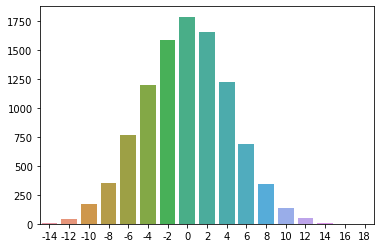

In [ ]:
# Иммитация доски Гальтона в коде
data = dict()
# количество шариков
N = 10000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

### Правило 3х-сигм

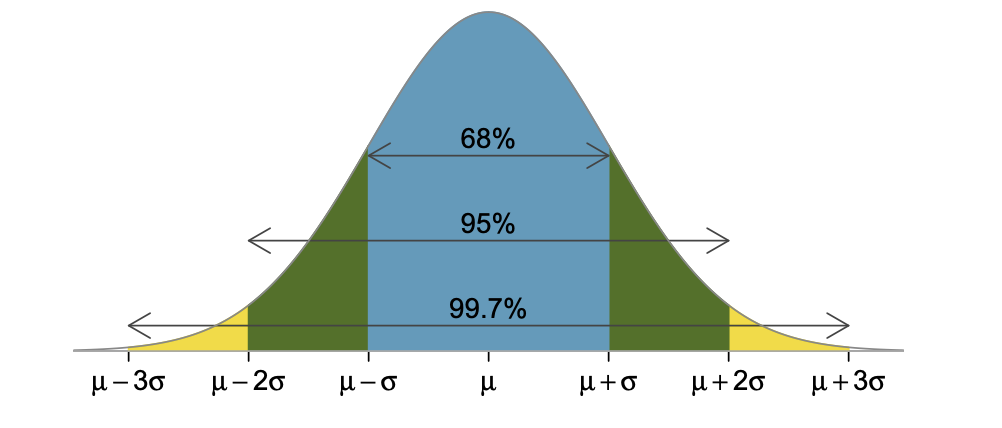

**Нормальное распределение** унимодально, симметрично, отклонения наблюдений от среднего подчиняются определенному вероятностному закону (правило $3σ$):

$P(x - σ < X < x + σ) = 0.6826$

$P(x - 2σ < X < x + 2σ) = 0.9544$

$P(x - 3σ < X < x + 3σ) = 0.9972$

### Z-преобразование

Преобразование полученных данных в стандартную Z-шкалу (Z-scores) со средним значением $M_z = 0$ и дисперсией $D_z = 1$. Чтобы привести к такому виду из каждого наблюдения нужно отнять среднее значение и разделить на стандартное отклонение. 

$$ Z_{i}=\frac{x_{i} - \overline{X}}{sd_x} $$

Z-преобразование наглядно показывает, сколько стандартных отклонений между значениями (1 стандартное отклонение = 1 шагу на графике).

[Online-калькулятор для вычисления Z](http://davidmlane.com/hyperstat/z_table.html)

[Online-калькулятор для вычисления z, t, F и пр.](https://gallery.shinyapps.io/dist_calc/)

### Вычисление Z в Python

`scipy.stats.norm.cdf()` - накопительная функция нормального распределения по известному $Z$. Т.е. сколько % от выборки расположены до/меньше заданной величины (**черная** область на изображении).

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/z_below.jpg'>




In [ ]:
# from scipy import stats 
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.cdf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 78.81% значений


`scipy.stats.norm.sf()` - сколько % от выборки расположены после/больше заданной величины (**черная** область на изображении).

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/z_above.jpg'>



In [ ]:
# from scipy import stats
print(f'На промежутке [0,8σ ; +∞] расположено {(stats.norm.sf(0.8)):.2%} значений')

На промежутке [0,8σ ; +∞] расположено 21.19% значений


`st.norm.cdf(z2) - st.norm.cdf(z1)` - сколько % от выборки расположены внутри заданного промежутка (**черная** область на изображении).

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/z_between.jpg'>

In [ ]:
#from scipy import stats 
print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(0.8) - stats.norm.cdf(-2)):.2%} значений')

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


`st.norm.cdf(z1) + st.norm.sf(z2)` - сколько % от выборки расположены за пределами заданного промежутка (**черная** область на изображении).

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/z_outside.jpg'>

In [ ]:
#from scipy import stats 
print(f'На промежутке [-∞ ; -2σ] U [0,8σ ; +∞] расположено {(stats.norm.sf(0.8) + stats.norm.cdf(-2)):.2%} значений')

На промежутке [-∞ ; -2σ] U [0,8σ ; +∞] расположено 23.46% значений


`st.norm.ppf()` - вычисление значения $Z$ по известному значению накопительной функции распределения. Обратное значение от `st.norm.cdf()`

In [ ]:
#from scipy import stats 
print(f'st.norm.ppf(st.norm.cdf(0.8)) = {stats.norm.ppf(stats.norm.cdf(0.8)):.1f}')
print(f'st.norm.ppf(st.norm.cdf(-2)) = {stats.norm.ppf(stats.norm.cdf(-2)):.1f}')

st.norm.ppf(st.norm.cdf(0.8)) = 0.8
st.norm.ppf(st.norm.cdf(-2)) = -2.0


### Примеры

In [ ]:
''' Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ > 125?
'''

mean = 100
std = 15
IQ = 125
# sf - Survival function = (1 - cdf) - Cumulative distribution function
print(f"Только у {(stats.norm(mean, std).sf(IQ))*100:.2f}% людей, IQ > {IQ}")

Только у 4.78% людей, IQ > 125


## 1.8 Центральная предельная теорема (CLT)
[Вернуться к содержанию](#Содержание)

**Визуализация:**

[Central Limit Theorem for Means](https://gallery.shinyapps.io/CLT_mean/)

Множество средних выборок из генеральной совокупности (ГС необязательно иметь нормальное распределение) будут иметь нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет называться **стандарной ошибкой среднего** ($se$).

Зная стандартное отклонение ГС и размер выборки мы можем рассчитать стандартную ошибку среднего.

$ se = \frac{\sigma}{\sqrt{N}} $, где

$\sigma$ - среднеквадратичное отклонение ГС ($\sigma = \sqrt{D}$)

$N$ - размер генеральной совокупности.

Если размер выборки $n$ достаточно большой ($n > 30$) и она является репрезентативной, то вместо стандарного отклонения ГС мы можем взять стандарное отклонение выборки.

$ se = \frac{sd}{\sqrt{n}} $, где

$sd$ - среднеквадратичное отклонение выборки ($sd = \sqrt{D}$)

$n$ - размер выборки.

**Стандартная ошибка среднего** - это среднеквадратическое отклонение распределения выборочных средних

### Примеры

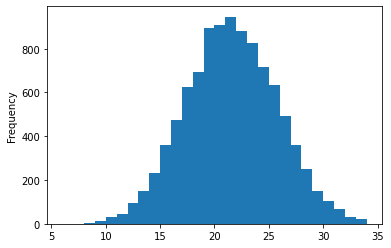

In [ ]:
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер генеральной совокупность
sp_size = 10000
# sp - Statistical population - генеральная совокупность
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

sp.plot.hist(bins=28)

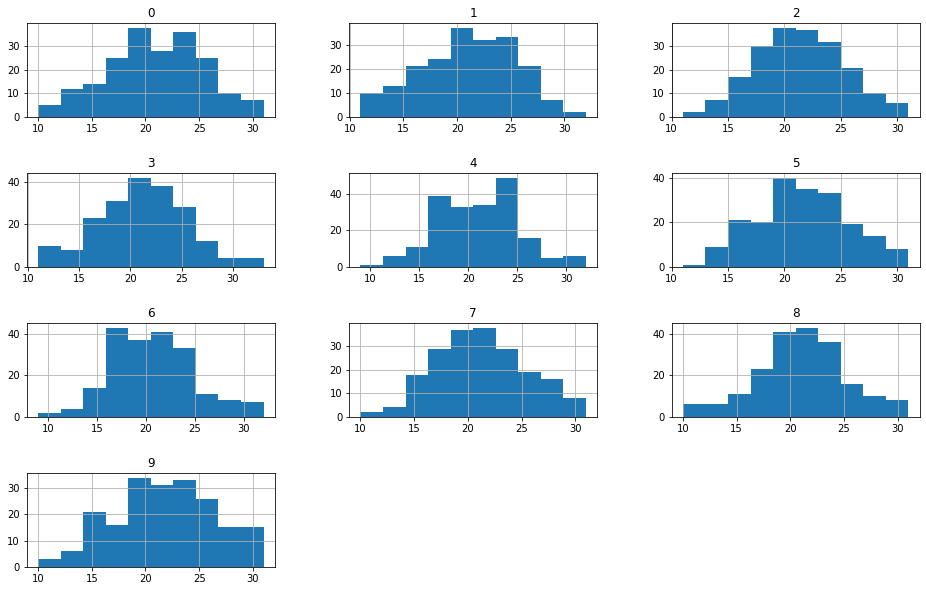

In [ ]:
# количество выборок
samples_count = 10
# размер выборки
sample_size = 200
samples = pd.DataFrame([
    [np.random.choice(sp) for _ in range(sample_size)] for __ in range(samples_count)
]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [ ]:
means = samples.mean()
print(f'Средняя ГС - sp.mean(): {round(sp.mean(), 4)}')
print(f'Средняя средних выборок: {round(means.mean(), 4)}')
print(f'Разница: {round(abs(means.mean() - sp.mean()), 5)}')
print(f'Стандартная ошибка среднего: {round(means.std(), 5)}')

Средняя ГС - sp.mean(): 21.0503
Средняя средних выборок: 21.0855
Разница: 0.0352
Стандартная ошибка среднего: 0.28541


In [ ]:
# возмем произвольную выборку 
sample = samples[0]
print(f'Sample mean: {sample.mean()}')
print(f'Sample SE: {round(sample.std() / math.sqrt(sample.size), 5)}')

Sample mean: 20.865
Sample SE: 0.30496


**Важное замечание о ЦПТ**

Пожалуй самый сложный момент - это как мы так взяли и заменили стандартное отклонение генеральной совокупности на выборочное. Ну и что с того, что у нас выборка объемом больше 30 наблюдений, что за магическое число такое? 

Все правильно, никакой магии не происходит. И совсем скоро мы в этом окончательно разберемся. Как только пройдем тему t - распределения во втором модуле. Вот тут я подробно расписал, как же нам нужно рассчитывать стандартную ошибку среднего, если мы не знаем стандартное отклонение в генеральной совокупности.

## 1.9 Доверительные интервалы для среднего
[Вернуться к содержанию](#Содержание)

Если мы имеем некоторую выборку и ГС, то мы **не можем точно** знать среднюю ГС, зная только среднее выборки. Однако **мы можем сказать, с некоторым процентом уверенности**, в каком интервале лежит средняя ГС. Понятно дело, что для нас лучше, чтобы этот интервал был как можно меньше, как это сделать?

Мы знаем, что средняя средних выборок, стремится к средней ГС, также мы знаем, что стандартная ошибка среднего описывает стандартное отклонение распределения средних выборок. Если мы возьмём случайную выборку $X$ и найдём её среднее $\bar{X}$, а также вычислим стандартную ошибку $se$, то мы можем вычислить доверительный интервал:

$[\overline{X} - 1.96*se; \overline{X} + 1.96*se]$ который описывает среднюю ГС с некотором интервале с 95% доверия.

Загадочное число **1,96** это количество сигм $\sigma$ в нормальном распределении, необходимые, чтобы охватить **95%** значений в этом распределении.

<img src="https://c.radikal.ru/c33/2103/1e/5453d6b8554a.png" width=200>

$[\overline{X} - 2.58*se; \overline{X} + 2.58*se]$ – 99% доверительный интервал

**Если мы рассчитали 95% доверительный интервал для среднего значения, это значит:**

 - <font color='crimson'>Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.</font>
 - <font color='green'>Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.</font>
 - <font color='green'>Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.</font>
 - <font color='crimson'>Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.</font>
 - <font color='crimson'>Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.</font> да-да, тут просто надо представить это в уме
 
 __Если из лекции усвоить разницу между средним ГС и средним выборки, а так же понять, что доверительный интервал строится для выборки, а не для ГС, то ответы в тесте легко определяются.__
  

In [ ]:
# Вычисление стандартного отклонения 1.96 c помощью scipy

# 95%
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1 - p) / 2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


### Вычисление доверительного интервала в Python

In [ ]:
'''Рассчитайте 99% доверительный интервал для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100
'''

p = 0.99
mean = 10
std = 5
n = 100

se = std / np.sqrt(n)
alpha = (1 - p) / 2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma * se, mean + sigma * se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


## 1.10 Идея статистического вывода
[Вернуться к содержанию](#Содержание)

**Нулевая гипотеза (H0)** – отсутствие значимых различий между средним значением выборки и средним значением генеральной совокупности.

**Альтернативная гипотеза (H1)** – значимое отклонение между средним значением выборки и средним значением генеральной совокупности.

**Ошибка 1 рода** – приняли альтернативную гипотезу, хотя верна нулевая.

**Ошибка 2 рода** – приняли нулевую гипотезу, хотя верна альтернативная.

### Статистическая проверка гипотез (p-value)

**p-уровень значимости (p-value, probability value)** - это вероятность получения такого или еще более сильного отклонения от среднего значения, если верна H0. Чем меньше **p-value**, тем больше оснований отклонить нулевую гипотезу.

Если эта вероятность оказывается меньше, чем заранее принятый уровень значимости (например, $p < 0.05$), мы вправе отклонить проверяемую нулевую гипотезу.

[Статья "Что такое p-value?"](http://datascientist.one/p-value/)

**Чтобы вычислить p-уровень значимости для нормального распределения:**

1. Найти на сколько стандартных отклонений (величину "z") среднее из новой экспериментальной выборки отличается от предполагаемого среднего значения в генеральной совокупности:

    $z = \frac{(x - μ)}{se}$


2. Определить, какой процент значений находится на промежутке
$[-∞ ; -z]$ U $[z ; +∞]$

3. Если полученное значение p < 0.05, принимаем H1, т.е. мы получили статистически значимое отклонение.

### Вычисление p-value в Python

In [ ]:
'''
x_mean - новое среднее
M_mean(μ) - среднее в генеральной совокупности
sd - стандартное отклонение в выборке
n - количество выборочных значений
'''

#python:
#from scipy import stats 
def calc_pvalue_norm(M_mean, x_mean, sd, n):
    se = sd / (n ** (0.5))
    z = abs((x_mean - M_mean) / se)
    p = (1 - stats.norm.cdf(z)) * 2
    return f'p-value={round(p, 5)}; стандартная ошибка среднего se={round(se, 5)}; стандартное отклонение z={round(z, 5)}'

print(calc_pvalue_norm(102, 99, 12, 64))

p-value=0.0455; стандартная ошибка среднего se=1.5; стандартное отклонение z=2.0


Из [видео StatQuest](https://www.youtube.com/watch?v=vemZtEM63GY):

**p-values** are numbers, between 0 and 1, that, in this example, quantify how confident we should be that **Drug A** is different form **Drug B**.

The closer a **p-value** is to **0**, the more confidence we have that **Drug A** and **Drug B** are different.

In practice, a commonly used threshold is **0.05**. It means that if there is no difference between **Drug A** and **Drug B**, and if we did this exact same experiment a bunch of times, then only **5%** of those experiments would result in the wrong decision.

Getting a small **p-value** when there is no difference is called a **False Positive**.

A **0.05** threshold for **p-values** means that **5%** of the experiments, where the only differences come from weird random things, will generate a **p-value** smaller than **0.05**.

In other words, if there is no difference between **Drug A** and **Drug B**, **5%** time we do the experiment, we'll get a **p-value** less than **0.05**, aka a **False Positive**.

Using a threshold of **0.00001** means we would only get a **False Positive** once every **100,000** experiments and likewise, if it's not that important then we can use a larger threshold and using a threshold of **0.2** means we are willing to get a **False Positive 2** times out of **10** experiments.

While a small **p-value** helps us decide if **Drug A** is different from **Drug B**, it does **not** tell us **how different** they are.

# Часть 2 Сравнение средних

## 2.1 Распределение Стьюдента (t-распределение)
[Вернуться к содержанию](#Содержание)

Распределение Стьюдента по сути представляет собой сумму нескольких нормально распределенных случайных величин. Чем больше величин, тем больше верятность, что их сумма будет иметь нормальное распределение. Таким образом, количество суммируемых величин определяет важнейший параметр формы данного распредения - число степеней свободы.

**Критерий Стьюдента t** чаще всего применяется для проверки нулевой гипотезы о равенстве средних значений двух совокупностей, хотя существует также и одновыборочная модификация этого метода.

**Критерий Стьюдента t** основан на допущениях:
- Сравниваемые выборки должны происходить из нормально распределенных совокупностей;
- Дисперсии сравниваемых генеральных совокупностей должны быть равны.
([ссылка](https://r-analytics.blogspot.com/2012/03/t.html))

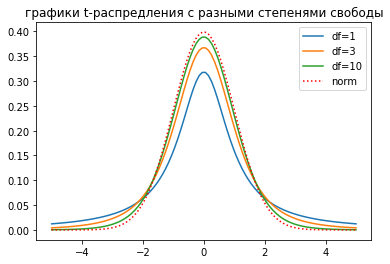

In [ ]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.'''
x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = stats.norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

График плотности распределения Стьюдента, как и нормального распределения, является симметричным и имеет вид колокола, но с более «тяжёлыми» хвостами.

### Подробно про нормальное и t-распределение

В видео лекциях говорилось, что мы используем **t-распределение** в ситуации небольшого объема выборки. Необходимо более подробно пояснить, зачем это нужно.

Вернемся к **центральной предельной  теореме**, мы уже узнали, что если некий признак в генеральной совокупности распределен **нормально** со средним $\mu$ и стандартным отклонением $\sigma$, и мы будем многократно извлекать выборки одинакового размера n, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$$\large z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

то эта величина $z$ будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения.

$$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$$

таким образом, в случае неизвестной $\sigma$ мы **всегда будем иметь дело с t-распределением**. На этом этапе вы должны с негодованием спросить меня, почему же мы применяли z-критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t-распределение совсем близко подбирается к нормальному распределению.

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

### Вычисление p-уровня значимости для распределения Стьюдента в Python:

In [ ]:
'''На выборке в 15 наблюдений при помощи одновыборочного t-теста
проверяется нулевая гипотеза: μ=10 
и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости (двусторонний) равен:
'''

t = -2
n = 15
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print(f'p = {p:.3f}')

p = 0.065


In [ ]:
'''
x_mean - новое среднее
M_mean(μ) - среднее в генеральной совокупности
sd - стандартное отклонение в выборке
n - количество выборочных значений
accuracy - точность интервала (может быть равен 95 или 99)
'''

#python:
#from scipy import stats 
def calc_pvalue_t(M_mean, x_mean, sd, n):
    se = sd / (n ** 0.5)
    t = abs((x_mean - M_mean) / se)
    df = n - 1
    p = (1 - stats.t.cdf(t, df)) * 2
    return p

print('p = {:.5f}'.format(calc_pvalue_t(10, 10.8, 2, 25)))

# Доверительный интервал у соответствующего t - распределения:
def conf_interval_t(М_mean, sd, n, accuracy):
    se = sd / (n ** 0.5)
    df = n - 1
    alpha = (1 - accuracy / 100) / 2
    di_1 = М_mean - se * stats.t.ppf(1 - alpha, df)
    di_2 = М_mean + se * stats.t.ppf(1 - alpha, df)
    print(f'Доверительный интервал для среднего: [{round(di_1, 3)}; {round(di_2, 3)}]')
     
conf_interval_t(89.9, 11.3, 20, 99)

p = 0.05694
Доверительный интервал для среднего: [82.671; 97.129]


## 2.2 Сравнение двух средних. t-критерий Стьюдента

[Вернуться к содержанию](#Содержание)

**t-критерий Стьюдента** — сравнение средних в двух выборках, общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках (можно использовать и для большего количества групп, но в таком случае понадобятся поправки). Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига).

$H_0 : M_1 = M_2$

$H_1 : M_1 ≠ M_2$

$df = n_1 + n_2 - 2$

Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

$$ t = \frac{\bar{X_1} - \bar{X_2}}{se}$$

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$

Откуда берётся такая формула $se$?:

$$ (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $$
 
То есть:

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $$

причем ответ на вопрос, почему верно это равенство, кроется в свойстве дисперсии: дисперсия суммы независимых случайных величин равна сумме их дисперсий. а отклонение - это корень из дисперсии. отсюда ваша последняя формула

### Вычисление p-уровня значимости для сравнения двух средних в двух выборках в Python

In [ ]:
'''
x1_mean - среднее в 1ой выборке
x2_mean - среднее во 2ой выборке
sd1 - стандартное отклонение в 1ой выборке
sd2 - стандартное отклонение в 2ой выборке
n1 - количество наблюдений в 1ой выборке
n2 - количество наблюдений во 2ой выборке
'''

#python:
#from scipy import stats 
def calc_pvalue_t2(x1_mean, x2_mean, sd1, sd2, n1, n2):
    se = math.sqrt(sd1 ** 2 / n1 + sd2 ** 2 / n2)
    t = abs((x1_mean - x2_mean) / se)
    #print(t)
    df = n1 + n2 - 2
    p = (1 - stats.t.cdf(t, df)) * 2
    return p

print('p = {:.5f}'.format(calc_pvalue_t2(89.9, 80.7, 11.3, 11.7, 20, 20))) 

p = 0.01569


### Пример 1

In [ ]:
# массивы с температурами плавления ДНК двух типов
array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p) / 2, df['Mx']-1)
df['interval'] = K * df['SE']

df

,Mx,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.545754
Выборка2,75.735,15.458102,20.0,3.456537,6.886174


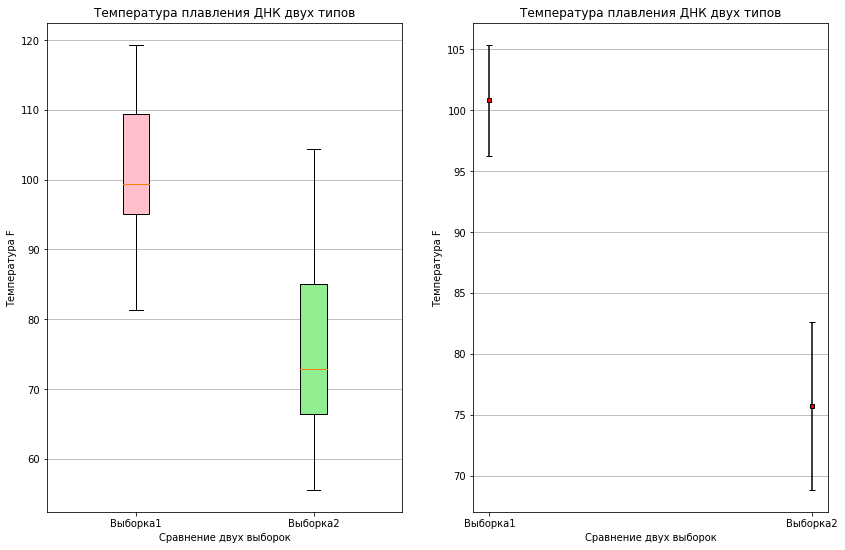

In [ ]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

### Пример 2

Рассчитайте доверительный интервал основываясь на знании **t - распределения** для среднего значения температуры плавления ДНК у первого вида:

$ \bar{X}=89,9\quad sd=11,3\quad n=20 $

In [ ]:
mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1 - p
# стандартная ошибка
se = sd / np.sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1 - (alpha / 2))

# доверительный интервал 
сonfidence_interval = (mean - t_value * se, mean + t_value * se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


### Пример 3

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

<img src="https://c.radikal.ru/c34/2103/b6/ed919de5017a.png" width=500>

In [ ]:
mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100

se = np.sqrt((sd_m ** 2) / N + (sd_f ** 2) / N)
t_value = (mean_m - mean_f) / se

p = stats.t.sf(t_value, N - 2)
print(f'p={round(p, 20)}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=5.3289339e-13
Мы можем отклонить нулевую гипотезу


### Применимость критерия Стьюдента


1. Независимость каждого из наблюдений

2. Гомогенность дисперсий, т.е. дисперсии в двух выборках приблизительно одинаковы. Проверка: критерий Левана или критерий Фишера

3. Нормальность распределения при n < 30

## 2.3 Проверка распределения на нормальность
[Вернуться к содержанию](#Содержание)

**Проверка на нормальность:**

1. Построить [график-гистограмму](https://stepik.org/lesson/8082/step/3?unit=1361) или [график QQ-plot](https://stepik.org/lesson/8082/step/4?unit=1361) (если наблюдений мало)
2. Тест Колмагорова-Смирнова и тест Шапиро-Уилка: если получаем p-уровень значимости больше 0.05, значит наша выборка значимо не отличается от нормальной.

**QQ-plot** - (график квантиль-квантиль) – показывает насколько выборочное значение соответствует нормальному распределению, линия – идеальное нормальное распределение.


### Пример 1

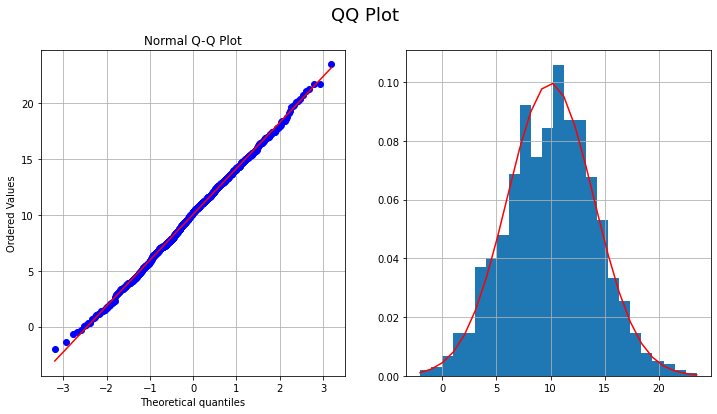

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")
ax1.grid()

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')
ax2.grid()
 
plt.show()

### Пример 2

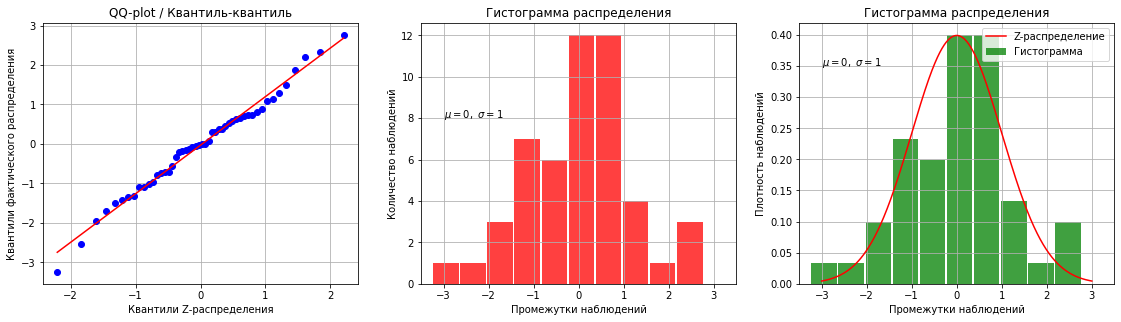

In [ ]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

mean = 0  # среднее значение распределения
sd = 1    # Стандартное отклонение
N = 50    # Количество наблюдений

# Построим график QQ-plot
# Генерация нормального распределения со средним значением распределения mean, стандартным отклонением sd и количеством элементов в выборке N
sample = np.random.normal(loc=mean, scale=sd, size=N)
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(sample, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантилей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)  # Включить сетку

# Построим гистограмму 
plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(sample, N//5, density=False, facecolor='r', alpha=0.75, label='Гистограмма', rwidth=0.95)  # Cтроим гистограмму
plt.title('Гистограмма распределения')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Количество наблюдений')  # Подпись по оси Y
plt.text(-3, 8, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим гистограмму c плотностью
plt.subplot(1, 3, 3)
n, bins, patches = plt.hist(sample, N//5, density=True, facecolor='g', alpha=0.75, label='Гистограмма', rwidth=0.95, stacked=True)  # Cтроим гистограмму
plt.title('Гистограмма распределения')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Плотность наблюдений')  # Подпись по оси Y
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean - 3 * sd, mean + 3 * sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  # Строим график Z-распределения

plt.legend(loc="upper right")  # Показать легенду
plt.show()  # Показать фигуру

Еще одной возможностью проверки распределения на нормальность является тест Шапиро-Уилко и Колмогорова-Смирнова. Мы не будем сейчас вдаваться в подробности о том, как устроены эти тесты. Однако, в этих тестах за нулевую гипотезу принимается гипотеза о том, что наша выборка принадлежит **ГС**, где значения распределены нормально. Поэтому при получении значения $p-value > 0.05$ у нас будет недостаточно оснований отклонить это гипотезу, а потому, мы будем считать, что имеющаяся выборка распределена нормально.

In [ ]:
shapiro_test = stats.shapiro(sample)
print(f'Шапиро-Уилко: p={round(shapiro_test[1], 3)} - Выборка распределена нормально.') if shapiro_test[1] > 0.05\
     else print(f'Шапиро-Уилко: p={round(shapiro_test[1], 3)} - Выборка распределена не нормально.')

ks_test = stats.kstest(sample, 'norm')
print(f'Колмогоров-Смирнов: p={round(ks_test[1], 3)} - Выборка распределена нормально.') if ks_test[1] > 0.05\
     else print(f'Колмогоров-Смирнов: p={round(ks_test[1], 3)} - Выборка распределена не нормально.')

Шапиро-Уилко: p=0.942 - Выборка распределена нормально.
Колмогоров-Смирнов: p=0.873 - Выборка распределена нормально.


Стоит сказать, что **t-критерий Стьюдента, тест Шапиро-Уилко и тест Колмогорова-Смирнова** очень сильно подвержены влияниям выбросов. Даже одно сильно отклоненное значение может существенно исказить результаты. Чтобы избежать этого необходимо:
1. Очищать выборку от выбросов до применения критериев

2. Альтернатива: использовать тест **Манна-Уитней**

In [ ]:
another_sample = np.random.uniform(low=-3.0, high=3.0, size=50)  # Еще одна выборка, но распределенная равномерно

mw_test = stats.mannwhitneyu(sample, another_sample)
print(f'Манн-Уитни: p={round(mw_test[1], 3)} - Выборка распределена нормально.') if mw_test[1] > 0.05\
         else print(f'Манн-Уитни: p={round(mw_test[1], 3)} - Выборка распределена не нормально.')

Манн-Уитни: p=0.318 - Выборка распределена нормально.


Неожиданный результат, говорящий о том, что равномерное распределение тоже очень похоже на нормальное при малом количестве наблюдений.

## 2.4 Однофакторный дисперсионный анализ
[Вернуться к содержанию](#Содержание)

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей с одним фактором** (одна независимая номинативная переменная).

Для сравнения нескольких групп между собой можно использовать **дисперсионный анализ** или **критерий Фишера**, основанный на распределении Фишера.

Переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**.



**ANOVA** (ANalysis Of VAriance) позволяет сранивать средние значения в трех и более группах.

$H0 : M1 = M2 = ... = Mi$

$H1 : !(M1 = M2 = ... = Mi)$

Изменчивость имеющихся данных ($SS_t$) может быть обусловлена изменчивостью внутри групп ($SS_w$) и изменчивостью между группами ($SS_b$):

* Если большая часть общей изменчивости ($SS_t$) обеспечивается благодаря изменчивости между группами ($SS_b$), это означает, что группы различаются между собой.
* Если большая часть общей изменчивости ($SS_t$) обеспечивается благодаря внутригрупповой изменчивости ($SS_w$), то это говорит о том, что группы не различаются.
* Если межгрупповой показатель изменчивости ($SS_b$) значительно превышает внтуригрупповой ($SS_w$), то весьма вероятно что как минимум два средних значения отличаются друг от друга.

$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$
где:

$SS_t$ - Total Sum of Squares - Общая сумма квадратов (сумма квадратов отклонений от среднего) - Характеризует изменчивость данных без учета разделения на группы\
$SS_b$ - Sum of Squares Between groups - Сумма квадратов междугрупповая\
$SS_w$ - Sum of Squares Within groups - Сумма квадратов внутригрупповая\
$n_j$ - Количество наблюдений внутри группы\
$x_j$ - Среднее значение внутри группы\
$x_i$$_j$ - Отдельно взятое значение внутри группы

Усредненное значение межгрупповой суммы квадратов называется **межгрупповым средним квадратом** (межгрупповая дисперсия):

$ MS_{B} = \frac{SS_{B}}{df_{B}} $

$MS_B$ - Mean Square Between - Межгрупповой средний квадрат

**Внутригрупповой средний квадрат** (внтуригрупповая дисперсия):

$ MS_{W} = \frac{SS_{W}}{df_{W}} $

$MS_W$ - Mean Square Within - Внутригрупповой средний квадрат

**Степени свободы:**

$ df = df_{B} + df_{W} = N - 1 $

$ df_{B} = m - 1 $

$ df_{W} = n(m-1) = N - m $

$df$ - Общее число степеней свободы\
$df_B$ - Число межгрупповых степеней свободы (Degrees of Freedom Between-Groups)\
$df_W$ - Число внутригрупповых степеней свободы (Degrees of Freedom Within-Groups)\
$N$ - Общее число значений в таблице (равно произведению количества наблюдений и количества групп)\
$n$ - Количество наблюдений\
$m$ - Количество групп

**F-критерий Фишера:**

$ F = \frac{MS_{B}}{MS_{W}}$

$F$ - F Ratio - F-значение (распределение Фишера)

Чем ближе **F Ratio** к 1, тем меньше у нас оснований утверждать, что внутри- и межгрупповая дисперсии различаются. Иными словами, у нас нет оснований отклонить сформулированную выше нулевую гипотезу.

Если же **F Ratio** значительно выше 1, то нулевую гипотезу можно отклонить.

**Расчет p-value для F-распределения:**

[Distribution Calculator](https://gallery.shinyapps.io/dist_calc/)

### Вычисление F-критерия Фишера в Python

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)

Среднее значение всех наблюдений: 4.0
SSB - Сумма квадратов междугрупповая: 24.0
SSW - Сумма квадратов внутригрупповая: 6.0
SST - Сумма квадратов отклонений от среднего: 30.0

dfb - Число межгрупповых степеней свободы: 2
dfw - Число внутригрупповых степеней свободы: 6

MSb - Межгрупповой средний квадрат: 12.0
MSw - Внутригрупповой средний квадрат: 1.0

F-значение = 12.0 (> 1)

Результат:
p=0.008 - отклоняем нулевую гипотезу


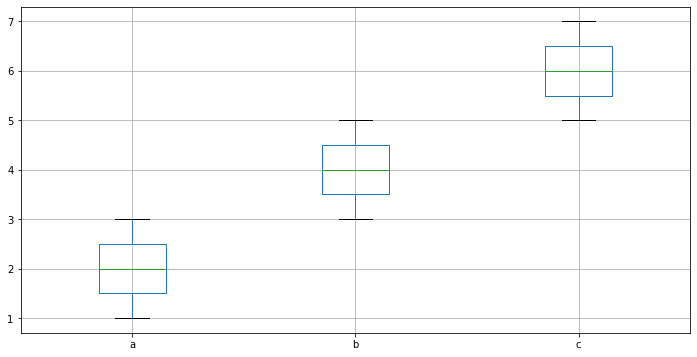

In [ ]:
# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
print()

# Среднее значение всех наблюдений
grand_mean = data.values.flatten().mean()
print('Среднее значение всех наблюдений:', grand_mean)

# Сумма квадратов междугрупповая
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2  for group, group_mean in data.mean().items())
print('SSB - Сумма квадратов междугрупповая:', ssb)

# Сумма квадратов внутригрупповая
ssw = sum(sum((x - group_mean) ** 2 for x in data[group]) for group, group_mean in data.mean().items())
print('SSW - Сумма квадратов внутригрупповая:', ssw)

# Сумма квадратов отклонений от среднего
sst = ssb + ssw
print('SST - Сумма квадратов отклонений от среднего:', sst)
print()

groups = data.shape[1]
# Число межгрупповых степеней свободы (Between-Groups): dfb = m - 1
dfb = groups - 1
print('dfb - Число межгрупповых степеней свободы:', dfb)
# Число внутригрупповых степеней свободы (Within-Groups): dfw = N - m
dfw = data.size - groups
print('dfw - Число внутригрупповых степеней свободы:', dfw)
print()

# Межгрупповой средний квадрат (Mean Square Between)
mssb = ssb/dfb
print('MSb - Межгрупповой средний квадрат:', mssb)
# Внутригрупповой средний квадрат (Mean Square Within)
mssw = ssw/dfw
print('MSw - Внутригрупповой средний квадрат:', mssw)
print()

f_value = mssb/mssw
print(f'F-значение = {f_value} (> 1)'if f_value > 1 else f'F-значение = {f_value} (< 1)')
print()

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print(f'p={round(p, 5)} - отклоняем нулевую гипотезу')
else:
    print(f'p={round(p, 5)} - НЕ отклоняем нулевую гипотезу')

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/f_distribution.png'>

### Однофакторный дисперсионный анализ в Python

[Four Ways to Conduct One-Way ANOVA with Python](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

F = 8.04, p = 0.000152


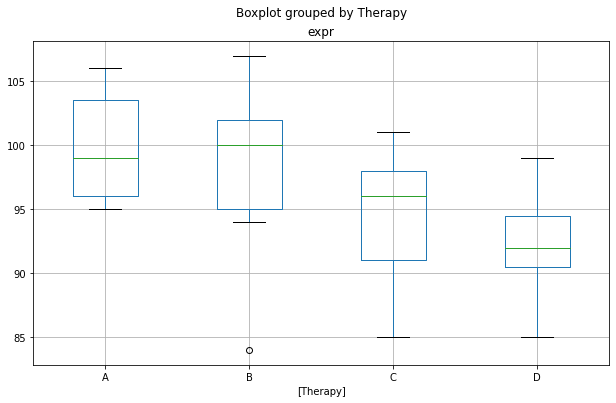

In [ ]:
#import pandas as pd
#from scipy import stats

data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

A_therapy = data_stepik[data_stepik["Therapy"] == "A"]["expr"]
B_therapy = data_stepik[data_stepik["Therapy"] == "B"]["expr"]
C_therapy = data_stepik[data_stepik["Therapy"] == "C"]["expr"]
D_therapy = data_stepik[data_stepik["Therapy"] == "D"]["expr"]

terapy_abcd = [A_therapy, B_therapy, C_therapy, D_therapy]

F, p = stats.f_oneway(A_therapy, B_therapy, C_therapy, D_therapy)

# Другой вариант записи:
# F, p = stats.f_oneway(*terapy_abcd)
# * - звёздочка означает, что мы передаём содержимое списка как набор аргументов (иначе был бы один аргумент - список)

print(f'F = {round(F, 2)}, p = {round(p, 6)}')

# Группируем по Therapy и рисуем boxplot для каждой группы
data_stepik[['Therapy', 'expr']].boxplot(by='Therapy', return_type='axes', figsize=(10, 6))
plt.show()
# [['Therapy', 'expr']] - указываем столбцы, по которым строим график.
# В данном случае можно удалить и ничего не изменится, т.к. столбцов в data всего два - 'Therapy' и 'expr'

# подробности синтаксиса ".boxplot()"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.boxplot.html


**Построение графика с использованием matplotlib:**

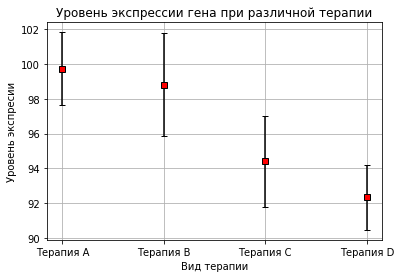

In [ ]:
#import pandas as pd
'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

A_therapy = data_stepik[data_stepik["Therapy"] == "A"]["expr"]
B_therapy = data_stepik[data_stepik["Therapy"] == "B"]["expr"]
C_therapy = data_stepik[data_stepik["Therapy"] == "C"]["expr"]
D_therapy = data_stepik[data_stepik["Therapy"] == "D"]["expr"]

terapy_abcd = [A_therapy, B_therapy, C_therapy, D_therapy]
'''

# import math
# import matplotlib.pyplot as plt
# import statistics

names = ['Терапия A', 'Терапия B', 'Терапия C', 'Терапия D']

list_mean = [i.mean() for i in terapy_abcd]

list_se = [statistics.stdev(i)/math.sqrt(len(terapy_abcd)) for i in terapy_abcd]

plt.errorbar(x=names, y=list_mean, yerr=list_se, color="black", capsize=3, marker="s", markersize=6, mfc="red", mec="black", fmt = 'o')
# Первые 3 параметра (x, y, yerr) - обязательные. Остальные можно удалить, они лишь стилизация графика
# capsize - длина чёрточек на краях отрезков
# marker - форма средних значений (красных квадратов)
# markersize - размер средних значений (красных квадратов)
# fmt = 'o' - убрать линии соединения между точками средних значений
# др. подробности синтаксиса ".errorbar()" - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

plt.title('Уровень экспрессии гена при различной терапии')
plt.grid() # - отображает размерную сетку на графике
plt.xlabel('Вид терапии')
plt.ylabel('Уровень экспресии')
plt.show()

## 2.5 Множественные сравнения в ANOVA
[Вернуться к содержанию](#Содержание)

Применяя однофакторный дисперсионный анализ, мы можем проверить нулевую гипотезу о том, что все сравниваемые группы происходят из одной генеральной совокупности, и следовательно их средние значения не различаются, т.е. H0 : M1 = M2 = ... = Mi. Если нулевую гипотезу не удается отвергнуть при заданном уровне значимости (например, α = 0.05), в дальнейшем анализе, в принципе, нет необходимости. Но если нулевая гипотеза отвергается, мы делаем заключение о том, что средние значения сравниваемых групп значительно различаются (другими словами, изучаемый фактор оказывает существенное влияние на интересующую нас переменную). Это единственный вывод, который можно сделать при помощи дисперсионного анализа как такового. Однако какие именно группы отличаются друг от друга? Чтобы узнать это, необходимо выполнить попарные сравнения средних значений имеющихся групп. Критерий Стьюдента "в чистом виде" для таких сравнений неприменим в силу возникновения эффекта множественных сравнений. Поэтому при множественном попарном сравнении используются поправки.

**Поправка Бонферрони** (Bonferroni correction)

Если вероятность ошибки первого рода (получить значимые различия там, где их нет) возрастает пропорционально количеству групп, которые мы сравниваем между собой, то допустимый показатель p-уровня значимости (т.е. значение p, ниже которого различия считаются достоверными, обычно α = 0.05) нужно скорректировать на количество всех возможных комбинаций пар из имеющихся групп

$С^2_m = \frac{m!}{(2! \cdot (m-2)!} = \frac{m \cdot (m-1)}{2}$

Т.е. новый допустимый показатель p-уровня значимости:

$α = \frac{p}{С^2_m}$


[Multi-comparison with Tukey’s test and the Holm-Bonferroni method](https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/)

In [ ]:
# from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
'''

MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])
comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')

print(comp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
     A      B 0.5815 0.5701    0.5701  False
     A      C 3.0759 0.0082    0.0329   True
     A      D 4.7318 0.0003    0.0019   True
     B      C 2.2164 0.0437    0.1312  False
     B      D 3.4596 0.0038    0.0192   True
     C      D 1.2058 0.2479    0.4958  False
--------------------------------------------


При наличии большого числа сравниваемых групп **метод Бонферрони** становится очень консервативным, часто не позволяя отвергнуть даже те гипотезы, которые со всей очевидностью должны быть отвергнуты.

Для решения описанной проблемы (т.е. для выполнения большого числа попарных сравнений групповых средних без потери статистической мощности) используется **q-критерий Тьюки** (Tukey HSD), который представляет собой модифицированный критерий Стьюдента:

$q = \frac {\overline X_A - \overline X_B}{SE}$

Когда все сравниваемые группы содержат одинаковое число наблюдений m:

$SE = \sqrt {\frac {MS_W}{m}}$

$MS_W$ - внутригрупповой средний квадрат (внтуригрупповая дисперсия)

Когда сравниваемые группы содержат различное число число наблюдений m:

$SE = \sqrt{\frac{MSwg}{2} \Big ({\frac{1}{m_A} + \frac{1}{m_B}}\Big)}$

Благодаря тому обстоятельству, что в приведенных выше формулы стандартной ошибки входит внутригрупповая дисперсия $MS_W$, обеспечивается контроль над групповой вероятностью ошибки первого рода. Именно это делает **критерий Тьюки** подходящим критерием для выполнения большого числа попарных сравнений групповых средних.

In [ ]:
# from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])
'''

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


Рассчитываются доверительные интервалы разности между средними значениями групп $(\overline X_A - \overline X_B)$. Если такой интервал не включает в себя ноль, то можно отклонить нулевую гипотезу $H0$ о равенстве двух средних.

**Критерий Тьюки** имеет те же условия применимости, что и дисперсионный анализ:

1. Нормальность распределения данных
2. (особенно важно!) **однородность групповых дисперсий** (подробнее см. [здесь](https://r-analytics.blogspot.com/2013/05/blog-post.html)). Для проверки используем тест Левина (если p < 0,05, то проверка пройдена)

Устойчивость к отклонению от этих условий, равно как и статистическая мощность **критерия Тьюки**, возрастают при одинаковом числе наблюдений во всех сравниваемых группах

Почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выборке**
Чтобы выяснить это, сделаем эксперимент.

In [ ]:
def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание    
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2)/N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)

In [ ]:
def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнении множества выборок
    с помощью t-критерия
    
    repeat, n_samples, sample_size = количество повторов, количество выборок в каждом повторе, размер выборки
    
    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = np.random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)
    
    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

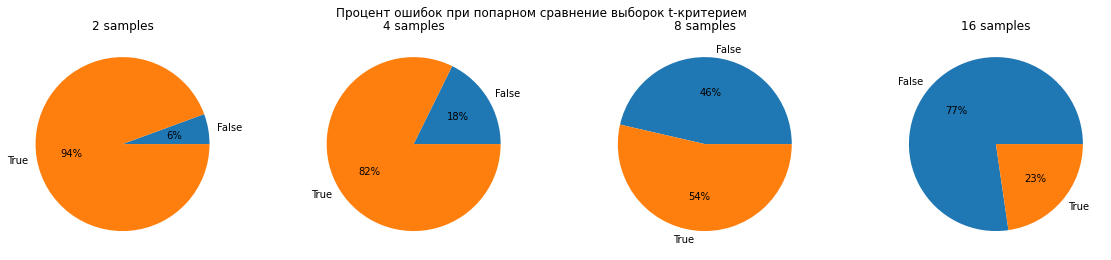

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 100, ax)
    ax.set_title(f'{n} samples')
    

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

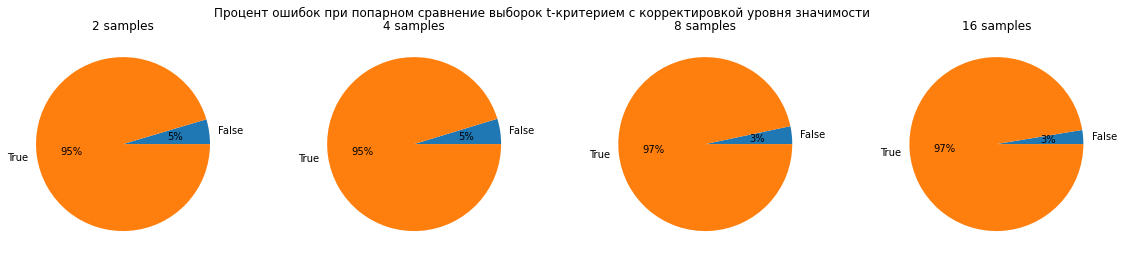

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2)
    pair_t_test(1000, n, 100, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае это будет арх-консервативная корректировка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.

### Ошибки первого и второго рода

<img src='https://ucarecdn.com/2b53f64a-ab8e-47c4-a9b3-b188c1a48c70/'/>

## 2.6 Многофакторный ANOVA
[Вернуться к содержанию](#Содержание)

### Двухфакторный дисперсионный анализ (Two-way analysis of variance)

Формула общей изменчивости:

$SS_t = SS_w + SS_{bA} + SS_{bB} + SS_{bA} \cdot SS_{bB}$

[Three ways to do a two-way ANOVA with Python](http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)

### Пример 1

Атеросклероз довольно опасное заболевание - причина ишемической болезни сердца и инсультов. Анализ экспрессии генов лейкоцитов позволяет предсказать вероятность развития данного заболевания. В эксперименте исследовался уровень экспрессии в зависимости от возраста пациентов и дозировки лекарства аторвастина.

In [ ]:
data_atero = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')

In [ ]:
data_atero.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


**Диаграмма**

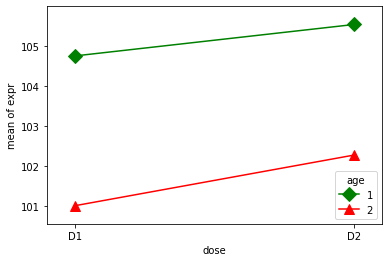

In [ ]:
fig = interaction_plot(data_atero.dose, data_atero.age, data_atero.expr, colors=['green', 'red'], \
                       markers=['D', '^'], ms=10)

**Степени свободы**

In [ ]:
N = len(data_atero.expr) # Количество наблюдений
m1 = len(data_atero.age.unique()) # Количество групп по колонке age
m2 = len(data_atero.dose.unique()) # Количество групп по колонке dose
df_a = m1 - 1 # Количество степеней свободы группы age
df_b = m2 - 1 # Количество степеней свободы группы dose
df_axb = df_a * df_b
df_w = N - m1 * m2 # Число внутригрупповых степеней свободы

In [ ]:
print('Количество наблюдений:', N)
print('Количество групп по колонке age:', m1)
print('Количество групп по колонке dose:', m2)
print('Количество степеней свободы группы age:', df_a)
print('Количество степеней свободы группы dose:', df_b)
print(df_axb)
print('Число внутригрупповых степеней свободы:', df_w)

Количество наблюдений: 64
Количество групп по колонке age: 2
Количество групп по колонке dose: 2
Количество степеней свободы группы age: 1
Количество степеней свободы группы dose: 1
1
Число внутригрупповых степеней свободы: 60


In [ ]:
# Общее среднее
grand_mean = data_atero['expr'].mean() # Общее среднее колонки expr
print('Общее среднее колонки expr:', round(grand_mean, 3))

Общее среднее колонки expr: 103.396


In [ ]:
# Суммы квадратов
ssq_a = sum([(data_atero[data_atero.age == i].expr.mean() - grand_mean)**2 for i in data_atero.age])
ssq_b = sum([(data_atero[data_atero.dose == i].expr.mean() - grand_mean)**2 for i in data_atero.dose])
ssq_t = sum((data_atero.expr - grand_mean)**2)
spl_age = [data_atero[data_atero.age == i] for i in data_atero.age.unique()]
age_means = [[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr - age_means[i])**2) for i in range(len(data_atero.age.unique()))])
ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

print(round(ssq_a, 2))
print(round(ssq_b, 2))
print(round(ssq_t, 2))
print(round(ssq_w, 2))
print(round(ssq_axb, 2))

197.45
16.91
1805.55
1590.26
0.93


In [ ]:
# Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w

# F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

# P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

**Результаты**

In [ ]:
results = {'sum_sq': [ssq_a, ssq_b, ssq_axb, ssq_w], \
          'df': [df_a, df_b, df_axb, df_w], \
          'F': [f_a, f_b, f_axb, 'NaN'], \
          'PR(>F)': [p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns = columns, index = ['age', 'dose', 'age:dose', 'Residual'])
print(aov_table1)

               sum_sq  df          F      PR(>F)
age        197.452754   1    7.44984  0.00831345
dose        16.912241   1   0.638094    0.427552
age:dose     0.927077   1  0.0349784    0.852272
Residual  1590.257424  60        NaN         NaN


                     sum_sq    df         F    PR(>F)
C(age)           197.452754   1.0  7.449841  0.008313
C(dose)           16.912241   1.0  0.638094  0.427552
C(age):C(dose)     0.927077   1.0  0.034978  0.852272
Residual        1590.257424  60.0       NaN       NaN


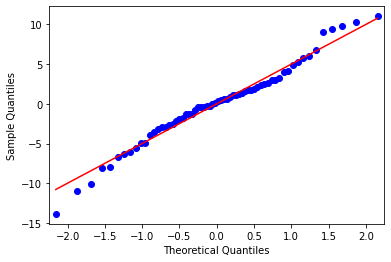

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
#import matplotlib.pyplot as plt

'''
data_atero = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')

'''
formula = 'expr~C(age)+C(dose)+C(age):C(dose)'
model = ols(formula, data_atero).fit()
aov_table2 = anova_lm(model, typ=2)

print(aov_table2)

#График:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

### [Пример 2](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp)

An introduction to Two Way ANOVA (Factorial) also known as Factorial Analysis.  Step by step visual instructions organize data to conduct a two way ANOVA.  Includes a comparison with One Way ANOVA.  Instructions on how to build a mean table.

In [ ]:
results = {'Gender': ['Boys', 'Boys', 'Boys', \
                      'Girls', 'Girls', 'Girls', \
                      'Boys', 'Boys', 'Boys', \
                      'Girls', 'Girls', 'Girls', \
                      'Boys', 'Boys', 'Boys', \
                      'Girls', 'Girls', 'Girls'], \
          'Score': [4, 6, 8, \
                    4, 8, 9, \
                    6, 6, 9, \
                    7, 10, 13, \
                    8, 9, 13, \
                    12, 14, 16], \
          'Age_Group': ['10 Year Olds', '10 Year Olds', '10 Year Olds', \
                        '10 Year Olds', '10 Year Olds', '10 Year Olds', \
                        '11 Year Olds', '11 Year Olds', '11 Year Olds', \
                        '11 Year Olds', '11 Year Olds', '11 Year Olds', \
                        '12 Year Olds', '12 Year Olds', '12 Year Olds', \
                       '12 Year Olds', '12 Year Olds', '12 Year Olds']}
columns = ['Gender', 'Score', 'Age_Group']
data = pd.DataFrame(results, columns = columns)

In [ ]:
data

<img src='https://d.radikal.ru/d16/2103/9b/bdfc81a4fdb5.png'/>

**Establish Hypothesis**\
H0: Gender will have no significant effect on students score (1st Factor).\
H0: Age will have no significant effect on students score (2nd Factor).\
H0: Gender and Age will have no significant effect on students score.

In [ ]:
data.Score.mean()

9.0

In [ ]:
round(data.loc[data.Gender == 'Girls'].Score.mean(), 2)

10.33

In [ ]:
round(data.loc[data.Gender == 'Boys'].Score.mean(), 2)

7.67

In [ ]:
round(data.loc[data.Age_Group == '10 Year Olds'].Score.mean(), 2)

6.5

In [ ]:
round(data.loc[data.Age_Group == '11 Year Olds'].Score.mean(), 2)

8.5

In [ ]:
round(data.loc[data.Age_Group == '12 Year Olds'].Score.mean(), 2)

12.0

In [ ]:
data_Girls = data.loc[data.Gender == 'Girls']
data_Girls.loc[data_Girls.Age_Group == '10 Year Olds'].Score.mean()

7.0

[**Пример 3**](https://stepik.org/lesson/9250/step/6?unit=1830)

Исследователей интересовало влияние инъекции некоторого гормона на показатель концентрации кальция в плазме крови у птиц с учетом их пола.

Инъекция (hormone) - независимая переменная №1\
Пол (sex) - независимая переменная №2\
Концентрация кальция (var4) - зависимая переменная

In [ ]:
URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

In [ ]:
data

In [ ]:
formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

Из результатов видно, что ни фактор инъекции, ни фактор пола не оказали значимого влияния на зависимую переменную концентрации кальция, т.к. значения Pr(>F) 0.769653 и 0.912318 соответственно. Но взаимодействие этих факторов C(hormone):C(sex) оказало довольно значимое влияние на зависимую переменную.

In [ ]:
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=data[data['sex']==1], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов man')

In [ ]:
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=data[data['sex']==0], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов woman')

Для мужского пола наличие инъекции приводит к увеличению концентрации кальция, а для женксого - к уменьшению, поэтому фактор пола не оказал значимого влияния на зависимую переменную.

### Гомогенность дисперсии
Условия для дисперсионного анализа:
- Нормальность распределения в каждой из групп
- Гомогенность дисперсии - дисперсия должна примерно одинаковой в каждой из групп

Нормальность распределения можно проверить на графиках QQ-plot и убедиться, что большинство точек лежит близко к прямой линии.\
Гомогенность дисперсии можно проверить в box plot на наличие выбросов и применить тест Левина (Levene's Test).

## 2.7 A/B тесты и статистика
[Вернуться к содержанию](#Содержание)

A/B тестирование - это проведение экспериментов при помощи статистики, пожалуй, самый яркий пример того, зачем статистика нужна в реальной жизни! A/B тесты - один из основных инструментов в продуктовой аналитике. Этот метод маркетингового исследования заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, где один или несколько показателей изменены для того, чтобы выяснить, какие из изменений улучшают целевой показатель. Например, мы можем поменять цвет кнопки для регистрации с красного на синий и сравнить, насколько это будет эффективно.

После интервью с [Никитой](https://www.youtube.com/watch?v=gljfGAkgX_o&t=4s) мы собрали источники, которые он одобряет и использует в работе с A/B тестами (а некоторые даже написаны им лично!):

1. Крутая [книга](https://experimentguide.com/) о том, как спланировать и провести своё первое A/B тестирование
2. [Подборка](https://exp-platform.com/) примеров применения A/B тестов в индустрии: как топовая литература на тему, так и интервью от сотрудников крупных компаний, применяющих A/B тесты в работе
3. Пошаговый, написанный с Никитой в соавторстве [гайдлайн](https://medium.com/@vktech/practitioners-guide-to-statistical-tests-ed2d580ef04f?fbclid=IwAR0Q7Gb-YmHG0Cg28IMC6RdBcjwqM466HaB4c-CtpXd03N-XyNzv9N5sWF0) для создания A/B тестов на языке Python
4. [Статья](https://research.google/pubs/pub43157/), описывающая как определять, комбинировать и объединять метрики (и комбинации из 2-3 метрик) с высокой прогнозирующей способностью таким образом, чтобы уменьшать их число и снижать вариативность
5. [Работа](https://arxiv.org/abs/1404.7530), рассматривающая различные подходы к планированию и созданию рандомизированных экспериментов, чтобы не получить мнимые отличия на этапе дизайна
6. Краткие [конспекты](https://research.fb.com/publications/top-challenges-from-the-first-practical-online-controlled-experiments-summit/) докладов исследователей и практиков из области анализа данных с конференции KDD 2019, где можно почерпнуть новаторские решения в планировании экспериментов для бизнеса
7. Краткое [руководство](https://onlineuserengagement.github.io/) как правильно выстроить работу b2c: на какие метрики необходимо смотреть и как их учитывать для улучшения работы

<hr>

# Часть 3 Корреляция и регрессия

## 3.1 Понятие корреляции
[Вернуться к содержанию](#Содержание)

**Ковариация** (ко - совместная, вариация - изменчивость) - мера **линейной** зависимости двух случайных величин.

$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$
где $N$ - количество случайных величин, а единица - количество степеней свободы.

Если **ковариация** положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

Однако только по **абсолютному** значению ковариации **нельзя судить** о том, **насколько сильно величины взаимосвязаны**, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется **коэффициентом корреляции Пирсона**, который всегда находится в интервале от −1 до 1.

**Коэффициент корреляции (Пирсона)** – показатель силы и направления взаимосвязи двух количественных переменных:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

**Коэффициент детерминации** – показывает в какой степени дисперсия одной переменной обусловлена *влиянием* другой переменной:

$R^2 = (r_{xy})^2$

Значение **коэффициента детерминации** находится в интервале $[0; 1]$

**Подробнее про формулу корреляции**

Давайте остановимся на формуле коэффициента корреляции, которую мы получили:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$
запишем формулу чуть подробнее и выполним возможные преобразования:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\sqrt{\sum{\frac{(x_i - \bar{x})^2}{N-1}}}\sqrt{\sum{\frac{(y_i - \bar{y})^2}{N-1}}}} $$

теперь вынесем 1/ (N - 1) из под корней 

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\frac{1}{(N-1)}\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

и сократим (N - 1)

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

таким образом, мы сократили N - 1 в знаменателе и получили финальную формулу для коэффициента корреляции, которую вы часто сможете встретить в учебниках:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$

### Вычисление коэффициента корреляции в Python

Чему равен коэффициент корреляции в данной выборке (попробуйте построить график для нахождения верного ответа):

X Y\
4 2\
5 1\
2 4\
3 3\
1 5

In [ ]:
df = pd.DataFrame({'X': [4,5,2,3,1], 'Y': [2,1,4,3,5]})

In [ ]:
df

,X,Y
0,4,2
1,5,1
2,2,4
3,3,3
4,1,5


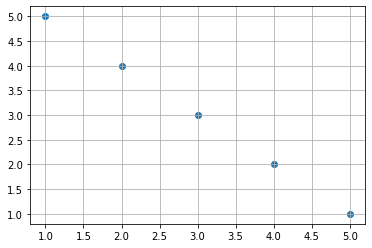

In [ ]:
plt.scatter(x='X', y='Y', data=df)
plt.grid()
plt.show()

In [ ]:
# коэффициент корреляции между переменными
r_xy = round(df['X'].corr(df['Y']), 3)
print(f"Коэффициент корреляции = {r_xy}")

Коэффициент корреляции = -1.0


### Демонстрация ковариации и корреляции в Python

In [ ]:
'''Демонстрация работы ковариации и корреляции'''

def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum() / (x.size - 1)

def cor(x, y):
    return cov(x, y) / (np.std(x, ddof=1) * np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if random.choice([True, False]) else -1
        res[i] = v + sign * alpha * random.random() * p
    return res

In [ ]:
x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

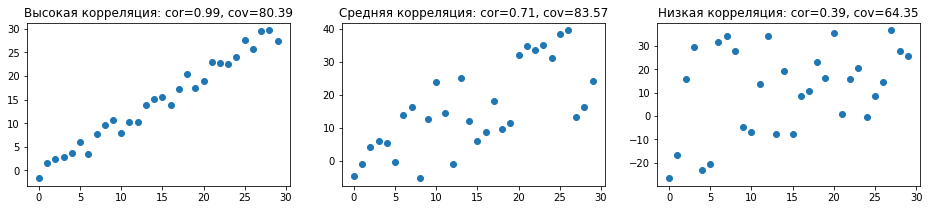

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title(f'Высокая корреляция: cor={round(cor(x, y), 2)}, cov={round(cov(x, y), 2)}')
ax2.set_title(f'Средняя корреляция: cor={round(cor(x, y1), 2)}, cov={round(cov(x, y1), 2)}')
ax3.set_title(f'Низкая корреляция: cor={round(cor(x, y2), 2)}, cov={round(cov(x, y2), 2)}')
plt.show()

[Визуализация изменения коэффициента корреляции в зависимости от распределения точек](https://rpsychologist.com/correlation/)

**Коэффициент корреляции Пирсона (correlation)**\
$r_{(x, y)}$ - показатель силы и направления взаимосвязи двух количественных переменных.

Знак коэффициента корреляции показывает направление взаимосвязи.\
При положительном значении коэффициента наблюдается положительная взаимосвязь между переменными, т.е. при **увеличении** значения первой переменной **увеличивается** значение второй переменной.\
При отрицательном значении коэффициента наблюдается отрицательная взаимосвязь между переменными, т.е. при **увеличении** значения первой переменной **уменьшается** значение второй переменной.

Принимает значения [-1, 1].

## 3.2 Условия применения коэффициента корреляции
[Вернуться к содержанию](#Содержание)

Для применения **коэффициента корреляции Пирсона** необходимо:
1. Xарактер взаимосвязи между переменными должен быть **линейным и монотонным**.
2. **Нормальное распределение переменных** (значительные выбросы могут негативно сказаться на значении коэффициента корреляции)

Перед использованием коэффициента корреляции Пирсона необходимо построить диаграмму рассеивания (scatter plot), посмотреть на характер взаимосвязи между переменными и на наличие выбросов.






### Коэффициент корреляции Спирмена

**Коэффициент корреляции Спирмена**\
Использует ранги вместо реальных значений признаков и менее чувствителен к выбросам.

$$ r_{s} = 1 - \frac{6\sum{d_{i}^2}}{N(N^2-1)} $$

$r_s$ - коэффициент корреляции Спирмена\
$N$ - ранг значения\
$d$ - разность рангов в квадрате

## 3.3 Регрессия с одной независимой переменной
[Вернуться к содержанию](#Содержание)

В этой и следующих главах мы научимся работать  с **одномерным регрессионным анализом**, который позволяет проверять гипотезы о взаимосвязи одной  количественной зависимой переменной и нескольких независимых.

Сначала мы познакомимся с самым простым вариантом -  простой **линейной регрессией**, при помощи которой можно исследовать взаимосвязь двух переменных. Затем перейдем к множественной регрессии с несколькими независимыми переменными.

Линейная регрессия (англ. Linear regression) — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с **линейной функцией зависимости**.

В общем виде функция линейной регрессии выглядит как:
$$ y = b_0 + b_1x $$
$y$ - зависимая переменная\
$x$ - predictor - независимая переменная\
$b_0$ - intercept - свободный член, значение пересечения линии с осью $Y$ при $x = 0$\
$b_1$ - slope - задаёт наклон линии регрессии

строят регрессионную прямую методом наименьших квадратов (**МНК**)

**МНК** - это способ нахождения оптимальных параметров линейной регресссии ($b_0$,  $b_1$), таких, чтобы сумма квадратов ошибок (остатков) была минимальная.

Расчёт параметров идёт по таким формулам:

$$ b_1 = \frac{sd_y}{sd_x}r_{xy} $$
$$ b_0 = \bar{Y} - b_1\bar{X} $$

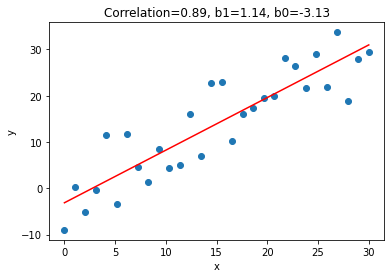

In [ ]:
'''Демонстрация метода наименьших квадратов (МНК)'''
x = np.linspace(0, 30, 30)
y1 = randomize(x, 0.3)

b1 = y1.std() / x.std() * np.corrcoef(x, y1)[0][1] # np.corrcoef(x, y1)[0][1] == stats.stats.pearsonr(x, y1)[0]
b0 = y1.mean() - b1 * x.mean()

f = lambda x: b0 + b1 * x
y_pred = f(x)
plt.title(f'Correlation={np.around(np.corrcoef(x, y1)[0][1], 2)}, b1={np.around(b1, 2)}, b0={np.around(b0, 2)}')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y1)
plt.plot(x, y_pred, color='r')
plt.show()

## 3.4 Гипотеза о значимости взаимосвязи и коэффициент детерминации
[Вернуться к содержанию](#Содержание)

Если коэффициент корреляции Пирсона равен 0 ($r_{x,y} = 0$), то коэффициент $b_1$:

$$ b_1 = \frac{sd_y}{sd_x}r_{xy} = 0 $$

А коэффициент $b_0$:

$$ b_0 = \bar{Y} - b_1\bar{X} = \bar{Y} $$

t-критерий $t$:

$$t = \frac{b_1-0}{se} = \frac{b_1}{se}$$

Количество степеней свободы $df$:
$$ df = N - 2 $$
$N$ - количество наблюдений.\
Проверяя нулевую гипотезу $H_0$ об отсутствии взаимосвязи двух переменных, мы проверяем $t$ - критерий о том, что в генеральной совокупности $b_1 = 0$.

**Коэффициент детерминации (shared variance)**\
$R^2$ - показывает в какой степени дисперсия одной переменной обусловлена влиянием другой переменной.

Равен квадрату коэффициента корреляции.

$$ R^2 = r_{(x, y)}^2 = 1 - \frac{SS_{res}}{SS_{total}} $$

$ SS_{res} $ - сумма квадратов остатков - это сумма расстояний от нашего наблюдения до регрессионной прямой в квадрате.

$ SS_{total} $ - сумма квадратов общей изменчивости - это сумма расстояний от нашего наблюдения до средних значений в квадрате.

Принимает значения [0, 1].

## 3.5 Условия применения линейной регрессии с одним предиктором
[Вернуться к содержанию](#Содержание)

### Условия применения регрессионного анализа

[Визуализация разных типов зависимостей](https://gallery.shinyapps.io/slr_diag/)

**1. Линейная взаимосвязь X и Y**

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/lineynost.png'>

**Пути ликвидации нелинейности:**

* Трансформация Тьюки (Tukey Ladder of Powers) – возведение X в степень, теряется интерпретируемость.
* Логарифмическая трансформация (Log transformation) – взятие логарифма от X и/или Y, интерпретируемость коэффициента наклона b1:
    - (log Y = b0 * log X) – на сколько процентов увеличится значение зависимой переменной при изменении зависимой переменной на 1%.
    - (log Y = b0 + b1 * X) – при единичном изменении переменной X, переменная Y в среднем изменяется на 100 * b1 процентов.
    - (Y = b0 + b1 * X) – изменение на 1% по X в среднем приводит к 0.01 * b1 изменению по переменной Y.
* Трансформация Бокса-Кокса (Box-Cox transformation) – обычно используется для трансформации зависимой переменной в случае, если у нас есть ненормальное распределение ошибок и/или нелинейность взаимосвязи, а также в случае гетероскедастичности.

**2. Независимость наблюдений.**

Источники:

* Повторные измерения (на разных уровнях независимой переменной): снижение чувствительности теста, искуственное увелечение мощности теста (псевдорепликация).
* Повторные пробы (на одном и том же уровне независимой переменной): искажение результатов.
* Кластеризация данных (нет повторных измерений, но данные взяты из нескольких гомогенных групп): искажение результатов.

**3. Независимость предикторов. Отсутствие мультиколлинеарности – линейной зависимости между предикорами.**

* Абсолютная мультиколлинеарность – корреляция между двумя предикторами равна ±1.
* Если мы хотим только предсказывать значения, то мультиколлинеарность не проблема.
* Для выявления можно построить корреляционную матрицу.
* VIF (Variance Inflation Factor) – показывает, насколько хорошо предиктор объясняется другими предикторами. Если VIF > 10, то предиктор лучше исключить из модели. Квадртаный корень из VIF показывает, во сколько раз стала больше стандартная ошибка данного коэффициента, по сравнению с ситуацией, если он был независим от других предикторов.</span>

**4. Нормальное распределение остатков.**

Проверка: Построить график распределения остатков: Q-Q plot (график квантиль-квантиль) или Histogramm (гистограмма)

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/norm_res2.png'>

**5. Гомоскедастичность**

Одинаковая изменчивость зависимой переменной на всех уровнях независимой переменной (постоянная изменчивость остатков). Т.е. ведут ли себя остатки одинаково относительно прямой $y = b0 + b1 * x$ на протяжении всего регресиионого анализа.

Проверка: Построить график распределения остатков Scatter plot (диаграмма рассеяния)

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/norm_res.png'>

Если мы построим регрессию, где зависимой переменной будет квадрат остатков модели Y~X, а независимой переменной будет предиктор X, и в этой модели окажется высокий и значимый R², это означает, что в данных есть гетероскедастичность.

Проверка: Тест Бройша — Пагана (Breusch-Pagan test), тест Уайта (White test).

**6. Отсутствие автокорреляции остатков.**

## 3.6 Применение регрессионного анализа и интерпретация результатов
[Вернуться к содержанию](#Содержание)

In [ ]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Есть данные по штатам с различными значениями:
 - **metro_res** - процент населения живущие в столице
 - **white** - процент белого населения
 - **hs_grad** - процент людей со средним образованием
 - **poverty** - уровень бедности
 - **female_house** - процент домов, где есть домохозяйки 
 
Исследуем связь уровня образования и бедности, где бедность будет ЗП, а уровень образования НП.

Первое, что нам необходимо сделать, это построить линейную модель, которая наилучшим образом будет описывать наши данные.

$$ \hat{y} = b_0 + b_1x $$

Далее, построив нашу модель, нам надо узнать, насколько хорошо наша объясняет ЗП, для этого найдём коэфицент детерминации $R^2$

Проверим нулевую гипотезу:
$$ b_1 = 0 : H0$$

Третья наша задача, это задача предсказания, по данным НП мы хотим предсказать ЗП.

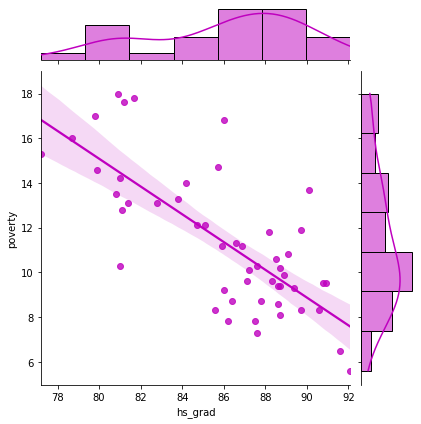

In [ ]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')
plt.show()

In [ ]:
df_descr = df.describe().transpose()
df_descr

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


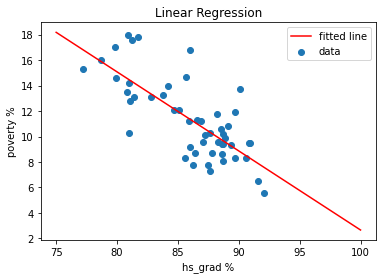

In [ ]:
'''Построим модель'''
# from scipy.stats import linregress
slope, intercept, r, p, std_err =  linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)

reg = lambda x: intercept + slope * x
plt.scatter(x='hs_grad', y='poverty', data=df, label='data')
plt.xlabel('hs_grad %')
plt.ylabel('poverty %')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
print(f'''
slope = {slope:.2f}
intercept = {intercept:.2f}
r = {r:.2f}
r squared = {(r ** 2):.2f}
p = {p:.5f}
std_err = {std_err:.3f}
''')


slope = -0.62
intercept = 64.78
r = -0.75
r squared = 0.56
p = 0.00000
std_err = 0.079



**Вывод:**

* Т.к. p-value < 0.05 , мы отклоняем нулевую гипотезу о том, что нет взаимосвязи между уровнем бедности и уровнем среднего образования.
* В штате, где уровень людей со средним образованием будет равен нулю, будет 64.78%(=b0) людей, проживающих за чертой бедности.
* С каждым 1% увеличения людей, имеющих среднее образование, количество людей, проживающих в бедности уменьшается на 0.62% (=b1).
* Практически 56% (=R²) изменчивости нашей зависимой переменной объясняется нашей моделью.
* Линия тренда y = 64.78 - 0.62 * x позволяет предсказывать значения y(∧) по интересующей нас x. (Бедность(∧) = 64.78 - 0.62 * Образование)

**Проверим остатки:**

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/res_exmpl.png'>

В целом требования гомоскедастичности и нормальности распределения остатков выполнено (хотя и присутствуют заметные положительные отклонения от нуля).

## 3.7 Задача предсказания значений зависимой переменной
[Вернуться к содержанию](#Содержание)

Линию регрессии иногда еще называют линией тренда.

## 3.8 Регрессионный анализ с несколькими независимыми переменными
[Вернуться к содержанию](#Содержание)

### Множественная регрессия (Multiple Regression)

Множественная регрессия позволяет исследовать влияние сразу нескольких независимых переменных на одну зависиммую.

$$ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$

$y$ - зависимая переменная\
$x_1, x_2, ..., x_n$ - независимые переменные

### Требования к данным

- линейная зависимость переменных
- нормальное распределение остатков
- гомоскедастичность данных
- проверка на мультиколлиарность
- нормальное распределение переменных (желательно)

### Пример расчёта и визуализации множественной регрессии

In [ ]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

# Построим плоскость предсказания
lm = smf.ols(formula='poverty ~ white + hs_grad', data=df).fit()
mesh_size = 1.0
margin = 2.0
x_min, x_max = df.white.min()- margin, df.white.max() + margin
y_min, y_max = df.hs_grad.min()- margin, df.hs_grad.max() + margin
z_pred = lambda x, y: lm.params.white * x  + lm.params.hs_grad * y + lm.params.Intercept
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
z_range = np.array([[z_pred(x, y) for x in x_range] for y in y_range])

# какие значения выше предсказания, а какие ниже
df['poverty_pred'] = np.array([poverty >= z_pred(df.white[i], df.hs_grad[i]) for i, poverty in df.poverty.items()])

# составим график
fig = px.scatter_3d(df, x='white', y='hs_grad', z='poverty',
                    color='poverty_pred', color_discrete_sequence=['red', 'green'],
                   title='зависиость процента белого населения и уровня образования на бедность населения')
fig.update_traces(marker=dict(size=3))
fig.add_traces(go.Surface(x=x_range,y=y_range, z=z_range, name='prediction', opacity=0.8))
fig.show()


Text(0.5, 0, 'poverty')

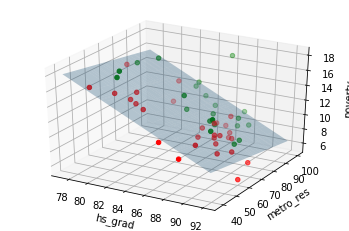

In [ ]:
data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

data.head()

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

## 3.9 Выбор наилучшей модели
[Вернуться к содержанию](#Содержание)

## 3.10 Классификация: логистическая регрессия и кластерный анализ
[Вернуться к содержанию](#Содержание)

## 3.11 GLM и продвинутые темы
[Вернуться к содержанию](#Содержание)

Ситуация: вы учите методы статистического анализа, впервые открываете для себя линейную регрессию. Чувство могущества может опьянять - наконец-то вы можете узнавать правду о мире с помощью математики! Но едва вы прикасаетесь к реальным данным, начинаются проблемы: распределения многих переменных не ведут себя так, как этого ожидает линейная регрессия. И с этого момента ваша жизнь становится хуже.

В этом уроке разберем:

● Устойчивые (Робастные) методы\
● Логистическая регрессия Logistic\
● Мультиномиальная регрессия Multinominal\
● Порядковая регрессия Ordinal\
● Регрессия Пуассона Poisson\
● Регрессия выживаемости Survival

Урок проведет Манаенков Александр\
Выпускник кафедры психофизиологии факультета психологии МГУ, ментор Karpov.Courses

Практическая часть будет реализована на Python, хотите научиться также? Посмотрите мой курс на Stepik по работе с данными в Python.

Данные, презентация и скрипты из урока:

- [credit_card.csv](https://stepik.org/media/attachments/course/76/credit_card__1_.csv)
- [GLM_Presentation.pdf](https://stepik.org/media/attachments/course/76/GLM_Presentation.pdf)
- [Sorta_GLM.ipynb](https://stepik.org/media/attachments/course/76/Sorta_GLM.ipynb) 
- [titanik_full_data (1).csv](https://stepik.org/media/attachments/course/76/titanik_full_data_1.csv)
- https://stepik.org/media/attachments/course/76/winequality-red.csv \
Приятного просмотра!

## 3.12 Заключение
[Вернуться к содержанию](#Содержание)

# Полезные ссылки

[Вернуться к содержанию](#Содержание)

- https://gallery.shinyapps.io/dist_calc/
    - сайт где можно визуализировать различные распределения и вести подсчёты
- [Основы статистики для веб-аналитика: 15 типов распределения вероятностей](https://spark.ru/startup/kinetica/blog/13462/osnovi-statistiki-dlya-veb-analitika-15-tipov-raspredeleniya-veroyatnostej)
- [Однофакторный дисперсионный анализ: введение](https://r-analytics.blogspot.com/2013/01/blog-post.html#.WP8csEuUe70)
- [Два однофакторных дисперсионных анализа: вычисление «вручную»](https://batrachos.com/BioStatistica_2Factors)